# Indian Election 2019: Data Analysis And Prediction Using Machine Learning

<img src="https://www.ft.com/__origami/service/image/v2/images/raw/http%3A%2F%2Fcom.ft.imagepublish.upp-prod-us.s3.amazonaws.com%2F5c2322c8-7deb-11e9-81d2-f785092ab560?fit=scale-down&source=next&width=700" width="1000">

## Table of contents

1. Introduction
2. Environment setup
3. Gathering the data
4. Features
5. Exploratory Data Analysis (EDA)
    - Lok sabha 2019: Election results
    - Party-wise vote share
    - Age distribution of candidates
6. Preparing the data
    - Resampling the data
    - Scaling the data
7. Machine learning model experimentation
    - Experimenting with different machine learning models
    - Manual hyperparameter tuning
    - Hyperparameter tuning using GridSearchCV
8. Evaluating the machine learning models
    - Fitting the models with best parameters
    - Classification report
    - Confusion matrix
    - Cross-validated metrics

## 1. Introduction
<br>
<p> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/March_2020_Parliament_Lok_sabha.svg/1200px-March_2020_Parliament_Lok_sabha.svg.png", style="float:left", width="300", height="180"> The Lok Sabha is composed of representatives of the people chosen by direct election on the basis of the adult suffrage. The maximum strength of the House envisaged by the Constitution is 552, which is made up by election of upto 530 members to represent the States, upto 20 members to represent the Union Territories and not more than two members of the Anglo-Indian Community to be nominated by the Hon'ble President, if,  in his/her opinion, that community is not adequately represented in the House. The total elective membership is distributed among the States in such a way that the ratio between the number of seats allotted to each State and the population of the State is, so far as practicable, the same for all States.</p>
<p> 

## 2. Environment setup

In [1]:
# Import numpy, pandas for data manipulation
import numpy as np
import pandas as pd

# Import plotly, matplotlib and seaborn as visualization tools
import matplotlib.pyplot as plt
from plotly import tools
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode
import seaborn as sns

# Import for resampling the data
from sklearn.utils import resample

# Import for scaling the data
from sklearn.preprocessing import StandardScaler

# Import machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Import model evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Plot should appear inside the jupyter notebook
%matplotlib inline

init_notebook_mode(connected=True)

## 3. Gathering the data

> The data for this project has been collected from Kaggle:
https://www.kaggle.com/prakrutchauhan/indian-candidates-for-general-election-2019

In [2]:
# Loading the dataset
df = pd.read_csv("data/LS_2.0.csv")

In [3]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [4]:
df.shape

(2263, 19)

In [5]:
df.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL\nCASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL\nVOTES', 'POSTAL\nVOTES', 'TOTAL\nVOTES',
       'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

## 4. Features

- STATE
- CONSTITUENCY
- NAME
- WINNER
- PARTY
- SYMBOL
- GENDER
- CRIMINAL CASES
- AGE
- CATEGORY
- EDUCATION
- ASSETS
- LIABILITIES
- GENERAL VOTES 
- POSTAL VOTES
- TOTAL VOTES
- OVER TOTAL ELECTORS IN CONSTITUENCY
- OVER TOTAL VOTES POLLED IN CONSTITUENCY
- TOTAL ELECTORS

## 5. Exploratory Data Analysis (EDA)

In [6]:
# Replacing the column names having \n with ' '
df.columns = df.columns.str.replace('\n',' ')

In [7]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATE                                     2263 non-null   object 
 1   CONSTITUENCY                              2263 non-null   object 
 2   NAME                                      2263 non-null   object 
 3   WINNER                                    2263 non-null   int64  
 4   PARTY                                     2263 non-null   object 
 5   SYMBOL                                    2018 non-null   object 
 6   GENDER                                    2018 non-null   object 
 7   CRIMINAL CASES                            2018 non-null   object 
 8   AGE                                       2018 non-null   float64
 9   CATEGORY                                  2018 non-null   object 
 10  EDUCATION                           

In [9]:
df.describe()

,WINNER,AGE,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
count,2263.000000,2018.000000,2.263000e+03,2263.000000,2.263000e+03,2263.000000,2263.000000,2.263000e+03
mean,0.238179,52.273538,2.615991e+05,990.710561,2.625898e+05,15.811412,23.190525,1.658016e+06
std,0.426064,11.869373,2.549906e+05,1602.839174,2.559822e+05,14.962861,21.564758,3.145187e+05
min,0.000000,25.000000,1.339000e+03,0.000000,1.342000e+03,0.097941,1.000039,5.518900e+04
25%,0.000000,43.250000,2.103450e+04,57.000000,2.116250e+04,1.296518,1.899502,1.530014e+06
50%,0.000000,52.000000,1.539340e+05,316.000000,1.544890e+05,10.510553,16.221721,1.679030e+06
75%,0.000000,61.000000,4.858040e+05,1385.000000,4.872315e+05,29.468185,42.590233,1.816857e+06
max,1.000000,86.000000,1.066824e+06,19367.000000,1.068569e+06,51.951012,74.411856,3.150313e+06


In [10]:
# Checking to see if the dataset contains any null values. We need to exclude NOTA votes while checking it.
df_NOTA = df[df['PARTY']!= 'NOTA']
df_NOTA.isna().sum()

STATE                                       0
CONSTITUENCY                                0
NAME                                        0
WINNER                                      0
PARTY                                       0
SYMBOL                                      0
GENDER                                      0
CRIMINAL CASES                              0
AGE                                         0
CATEGORY                                    0
EDUCATION                                   0
ASSETS                                      0
LIABILITIES                                 0
GENERAL VOTES                               0
POSTAL VOTES                                0
TOTAL VOTES                                 0
OVER TOTAL ELECTORS  IN CONSTITUENCY        0
OVER TOTAL VOTES POLLED  IN CONSTITUENCY    0
TOTAL ELECTORS                              0
dtype: int64

In [11]:
df.shape

(2263, 19)

In [12]:
# Dropping irrelevant columns from the dataset
df.drop(['SYMBOL', 'ASSETS', 'LIABILITIES'], axis=1, inplace=True)

In [13]:
# We need to exclude NOTA in order to get proper predictions
df = df[df['PARTY']!= 'NOTA']

In [14]:
df['EDUCATION'].unique()

array(['12th Pass', 'Post Graduate', 'Doctorate', 'Graduate', 'Others',
       '10th Pass', '8th Pass', 'Graduate Professional', 'Literate',
       'Illiterate', '5th Pass', 'Not Available', 'Post Graduate\n'],
      dtype=object)

In [15]:
# Removing the \n from 'Post Graduate\n'
df['EDUCATION'].replace(to_replace='Post Graduate\n', value='Post Graduate', inplace=True)

In [16]:
# 'Graduate Professional' are Graduates, so replacing 'Graduate Professional' with 'Graduate'
df['EDUCATION'].replace(to_replace='Graduate Professional', value='Graduate', inplace=True)

In [17]:
df['EDUCATION'].unique()

array(['12th Pass', 'Post Graduate', 'Doctorate', 'Graduate', 'Others',
       '10th Pass', '8th Pass', 'Literate', 'Illiterate', '5th Pass',
       'Not Available'], dtype=object)

In [18]:
df['AGE'] = df['AGE'].astype(int, errors='raise')

In [19]:
df.dtypes

STATE                                        object
CONSTITUENCY                                 object
NAME                                         object
WINNER                                        int64
PARTY                                        object
GENDER                                       object
CRIMINAL CASES                               object
AGE                                           int32
CATEGORY                                     object
EDUCATION                                    object
GENERAL VOTES                                 int64
POSTAL VOTES                                  int64
TOTAL VOTES                                   int64
OVER TOTAL ELECTORS  IN CONSTITUENCY        float64
OVER TOTAL VOTES POLLED  IN CONSTITUENCY    float64
TOTAL ELECTORS                                int64
dtype: object

In [20]:
# Replace the 'Not Available' columns with 0
df['CRIMINAL CASES'].replace(to_replace='Not Available', value=0, inplace=True)
df['CRIMINAL CASES'] = df['CRIMINAL CASES'].fillna(0)
df['CRIMINAL CASES'] = df['CRIMINAL CASES'].astype(int, errors='raise')

In [21]:
df.dtypes

STATE                                        object
CONSTITUENCY                                 object
NAME                                         object
WINNER                                        int64
PARTY                                        object
GENDER                                       object
CRIMINAL CASES                                int32
AGE                                           int32
CATEGORY                                     object
EDUCATION                                    object
GENERAL VOTES                                 int64
POSTAL VOTES                                  int64
TOTAL VOTES                                   int64
OVER TOTAL ELECTORS  IN CONSTITUENCY        float64
OVER TOTAL VOTES POLLED  IN CONSTITUENCY    float64
TOTAL ELECTORS                                int64
dtype: object

In [22]:
df.shape

(2018, 16)

### 5.1 Lok Sabha 2019: Election Results

In [23]:
# Number of seats won by each party
result = df[df['WINNER'] == 1].groupby('PARTY')['WINNER'].size()
result_df = pd.DataFrame(data=result).sort_values(by="WINNER", ascending=False)
result_df.reset_index(level=0, inplace=True)
result_df

,PARTY,WINNER
0,BJP,300
1,INC,52
2,DMK,23
3,AITC,22
4,YSRCP,22
5,SHS,18
6,JD(U),16
7,BJD,11
8,BSP,11
9,TRS,9


In [24]:
# Visualize the party-wise election results
result_fig = px.bar(result_df, x=result_df['PARTY'], y=result_df["WINNER"], color='WINNER', height=500)
result_fig.show()

### 5.2 Party-wise Vote Share

In [25]:
# Create a dataframe with total number of votes won by each party
result = df[df['WINNER'] == 1].groupby('PARTY')['WINNER'].size()
vote_Share = df.groupby('PARTY')['TOTAL VOTES'].sum()
vote_Share_df = pd.DataFrame(data=vote_Share, index=vote_Share.index).sort_values(by="TOTAL VOTES", ascending=False)
vote_Share_df.reset_index(level=0, inplace=True)
vote_Share_df

,PARTY,TOTAL VOTES
0,BJP,228938556
1,INC,119418722
2,AITC,24832104
3,BSP,20808194
4,SP,15616282
...,...,...
127,AKBMP,10127
128,ABSKP,9912
129,BBMP,9894
130,BARESP,9565


In [26]:
# Sort out the top five parties according to the total number of votes
vote_share_top5 = df.groupby('PARTY')['TOTAL VOTES'].sum().nlargest(5).index.tolist()

# Create a method to label parties as 'Other' if they are not top five in total number of votes.
def sort_party(data):
    '''
    Method to label parties as 'Other' if they are not top five in total number of votes.
    data: input rows
    '''
    if data['PARTY'] not in vote_share_top5:
        return 'Other'
    else:
        return data['PARTY']

# Calling the method
df['Party New'] = df.apply(sort_party, axis=1)

# Visualize Party-wise vote share
vote_count = df.groupby('Party New')['TOTAL VOTES'].sum()
vote_count_fig = go.Figure(go.Pie(labels=vote_count.index, 
                                  values=vote_count.values, 
                                  marker=dict(line=dict(color="#000000", 
                                                        width=1))))
vote_count_fig.update_layout(title_text='Party-wise Vote Share')
vote_count_fig.show()

### 5.3 Age Distribution of candidates

In [27]:
# Visualize the age distribution of candidates
age_distribution_fig = px.histogram(df, x="AGE")
age_distribution_fig.update_layout(title_text='Age Distribution of Candidates')
age_distribution_fig.show()

## 6. Preparing the data

### 6.1 Resampling the dataset

In [28]:
# Creating a dataframe of total counts of the winners and losers
total_winner = df[df['WINNER'] == 1]
total_loser = df[df['WINNER'] == 0]
total_results = df['WINNER'].value_counts().reset_index()
total_results.columns = ['Result', 'Total']
total_results

,Result,Total
0,0,1479
1,1,539


In [29]:
# Visualize the counts of total winners and losers
total_results_fig = px.bar(total_results, x=["Loser", "Winner"], y=total_results['Total'], color='Total')
total_results_fig.update_layout(title_text='Winners vs Losers')
total_results_fig.show()

The chart above clearly demonstrates an imbalance in Loser and Winner classes.

In [30]:
print(len(total_winner), len(total_loser))

539 1479


In [31]:
# Upsampling the data to match both the classes
df_winner_upsample = resample(total_winner, replace=True, n_samples = 1479, random_state=42)
print(len(df_winner_upsample), len(total_loser))

1479 1479


In [32]:
upsampled_dataset = pd.concat([total_loser, df_winner_upsample])

### 6.2 Scaling the data

In [33]:
upsampled_dataset.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'GENDER',
       'CRIMINAL CASES', 'AGE', 'CATEGORY', 'EDUCATION', 'GENERAL VOTES',
       'POSTAL VOTES', 'TOTAL VOTES', 'OVER TOTAL ELECTORS  IN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED  IN CONSTITUENCY', 'TOTAL ELECTORS',
       'Party New'],
      dtype='object')

In [34]:
# This is the dataset which will be used for fitting Machine Learning models
prediction_df = upsampled_dataset.drop(['Party New', 'NAME'], axis=1)

In [35]:
prediction_df.head()

,STATE,CONSTITUENCY,WINNER,PARTY,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
1,Telangana,ADILABAD,0,TRS,MALE,0,54,ST,Post Graduate,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,0,INC,MALE,3,52,ST,12th Pass,314057,181,314238,21.092771,29.534285,1489790
5,Uttar Pradesh,AGRA,0,BSP,MALE,0,47,SC,Post Graduate,434199,1130,435329,22.466390,37.999125,1937690
6,Uttar Pradesh,AGRA,0,INC,FEMALE,0,54,SC,Post Graduate,44877,272,45149,2.330042,3.940979,1937690
8,Maharashtra,AHMADNAGAR,0,NCP,MALE,1,34,GENERAL,Graduate,419364,3822,423186,22.734872,35.087431,1861396


In [36]:
# Putting categorical and numerical column names in different variables
categorical_features = ["STATE", 'CONSTITUENCY', 'PARTY', 'GENDER', 'CATEGORY', 'EDUCATION']
numerical_features = ['CRIMINAL CASES','AGE','TOTAL VOTES','TOTAL ELECTORS']

# Initializing the StandardScaler()
standardScaler = StandardScaler()

prediction_df1 = pd.get_dummies(prediction_df, columns = categorical_features)

In [37]:
prediction_df1.head()

,WINNER,CRIMINAL CASES,AGE,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS,STATE_Andaman & Nicobar Islands,...,EDUCATION_12th Pass,EDUCATION_5th Pass,EDUCATION_8th Pass,EDUCATION_Doctorate,EDUCATION_Graduate,EDUCATION_Illiterate,EDUCATION_Literate,EDUCATION_Not Available,EDUCATION_Others,EDUCATION_Post Graduate
1,0,0,54,318665,149,318814,21.399929,29.964370,1489790,0,...,0,0,0,0,0,0,0,0,0,1
2,0,3,52,314057,181,314238,21.092771,29.534285,1489790,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,47,434199,1130,435329,22.466390,37.999125,1937690,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,54,44877,272,45149,2.330042,3.940979,1937690,0,...,0,0,0,0,0,0,0,0,0,1
8,0,1,34,419364,3822,423186,22.734872,35.087431,1861396,0,...,0,0,0,0,1,0,0,0,0,0


In [38]:
prediction_df1[numerical_features] = standardScaler.fit_transform(prediction_df1[numerical_features])

In [39]:
prediction_df1.head()

,WINNER,CRIMINAL CASES,AGE,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS,STATE_Andaman & Nicobar Islands,...,EDUCATION_12th Pass,EDUCATION_5th Pass,EDUCATION_8th Pass,EDUCATION_Doctorate,EDUCATION_Graduate,EDUCATION_Illiterate,EDUCATION_Literate,EDUCATION_Not Available,EDUCATION_Others,EDUCATION_Post Graduate
1,0,-0.186473,0.076764,318665,149,-0.257567,21.399929,29.964370,-0.541263,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.133659,-0.094673,314057,181,-0.274618,21.092771,29.534285,-0.541263,0,...,1,0,0,0,0,0,0,0,0,0
5,0,-0.186473,-0.523267,434199,1130,0.176567,22.466390,37.999125,0.868686,0,...,0,0,0,0,0,0,0,0,0,1
6,0,-0.186473,0.076764,44877,272,-1.277242,2.330042,3.940979,0.868686,0,...,0,0,0,0,0,0,0,0,0,1
8,0,-0.079762,-1.637611,419364,3822,0.131322,22.734872,35.087431,0.628519,0,...,0,0,0,0,1,0,0,0,0,0


## 7. Machine learning model experimentation

In [40]:
np.random.seed(42)
# Splitting the data into X and y
X = prediction_df1.drop('WINNER', axis=1)
y = prediction_df1['WINNER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 7.1 Testing multiple machine learning models

- Random Forest Classifier
- Support Vector Machines
- K-Nearest Neighbour

In [41]:
models = {"RandomForestClassifier" : RandomForestClassifier(),
          "SupportVectorMachines" : SVC(),
          "KNearestNeighbor" : KNeighborsClassifier()}
def fit_and_score(models, X_train, y_train, X_test, y_test):
    '''
    Fits and evaluates the machine learning models.
    models : a dict of different Scikit-Learn machine learning models.
    X_train : training data (no labels)
    y_train : training lables
    X_test : testing data (no labels)
    y_test : testing lables
    '''
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [42]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             y_train=y_train,
                             X_test=X_test,
                             y_test=y_test)
model_scores_df = pd.DataFrame(model_scores, index=["Accuracy"]).T
model_scores_df

,Accuracy
RandomForestClassifier,0.967905
SupportVectorMachines,0.854730
KNearestNeighbor,0.898649


In [43]:
model_scores_df_fig = px.bar(model_scores_df, x=["Random Forest Classifier", "Support Vector Machines", "K-Nearest Neighbor"], y=model_scores_df["Accuracy"])
model_scores_df_fig.update_layout(title_text='Model Accuracy Comparison')
model_scores_df_fig.show()

### 7.2 Manual Hyperparameter Tuning

Tuning Random Forest Classifier

In [44]:
train_scores_random_forest = []
test_scores_random_forest = []
# Setting up n_estimators testing parameter in the range(1,21)
k_estimators = range(1, 21)

# Initializing the Random Forest Classifier()
random_forest = RandomForestClassifier()

# Looping through different n_estimators to find out best accuracy
for i in k_estimators:
    random_forest.set_params(n_estimators=i, random_state=42)
    random_forest.fit(X_train, y_train)
    train_scores_random_forest.append(random_forest.score(X_train, y_train))
    test_scores_random_forest.append(random_forest.score(X_test, y_test))

Maximum model score on the training data : 100.00%
Maximum model score on the test data : 96.96%


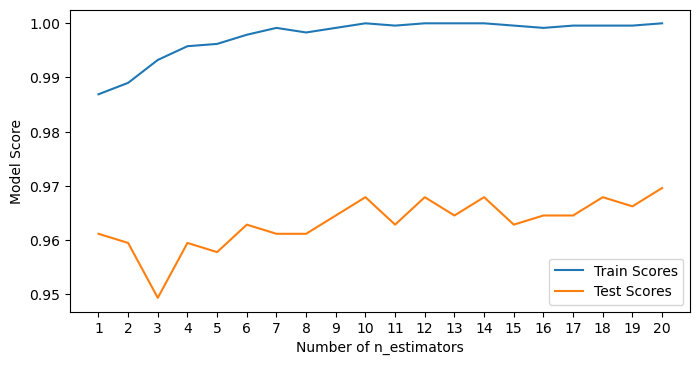

In [45]:
fig = plt.figure(figsize=(8,4), dpi=100)
plt.plot(k_estimators, train_scores_random_forest, label="Train Scores")
plt.plot(k_estimators, test_scores_random_forest, label="Test Scores")
plt.xticks(np.arange(1, 21))
plt.xlabel("Number of n_estimators")
plt.ylabel("Model Score")
plt.legend()
print(f"Maximum model score on the training data : {max(train_scores_random_forest)*100:.2f}%")
print(f"Maximum model score on the test data : {max(test_scores_random_forest)*100:.2f}%")

Tuning K-Nearest Neighbor Classifier

In [46]:
train_scores_knn = []
test_scores_knn = []
# Setting up n_neighbors testing parameter in the range(1,21)
k_neighbors = range(1, 21)

# Initializing the K-Nearest Neighbor Classifier()
knn = KNeighborsClassifier()

# Looping through different n_estimators to find out best accuracy
for i in k_neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores_knn.append(knn.score(X_train, y_train))
    test_scores_knn.append(knn.score(X_test, y_test))

Maximum model score on the training data : 100.00%
Maximum model score on the test data : 92.57%


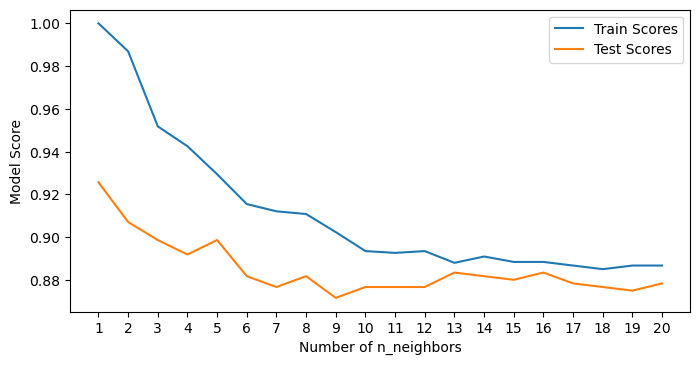

In [47]:
fig = plt.figure(figsize=(8,4), dpi=100)
plt.plot(k_neighbors, train_scores_knn, label="Train Scores")
plt.plot(k_neighbors, test_scores_knn, label="Test Scores")
plt.xticks(np.arange(1, 21))
plt.xlabel("Number of n_neighbors")
plt.ylabel("Model Score")
plt.legend()
print(f"Maximum model score on the training data : {max(train_scores_knn)*100:.2f}%")
print(f"Maximum model score on the test data : {max(test_scores_knn)*100:.2f}%")

### 7.3 Hyperparameter tuning using GridSearchCV

Tuning Random Forest Classifier

In [48]:
random_forest_grid_gs = {"n_estimators": range(10, 101)}
random_forest_gs = GridSearchCV(RandomForestClassifier(),
                           param_grid=random_forest_grid_gs,
                           cv=10,
                           verbose=True,
                           n_jobs=-1,
                           refit=True)
random_forest_gs.fit(X_train, y_train)
random_forest_gs.score(X_test, y_test)

Fitting 10 folds for each of 91 candidates, totalling 910 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 910 out of 910 | elapsed:   57.2s finished


0.9679054054054054

In [49]:
random_forest_gs.best_params_

{'n_estimators': 54}

Tuning the Support Vector Machine

In [50]:
svc_grid_gs = {"C": np.arange(2, 10, 2),
               "gamma": np.arange(0.1, 1, 0.2)}
svc_gs = GridSearchCV(SVC(),
                      param_grid=svc_grid_gs,
                      cv=10,
                      verbose=True,
                      n_jobs=-1,
                      refit=True)
svc_gs.fit(X_train, y_train)
svc_gs.score(X_test, y_test)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.4min finished


0.9510135135135135

In [51]:
svc_gs.best_params_

{'C': 2, 'gamma': 0.1}

Tuning K-Nearest Neighbor

In [52]:
knn_grid_gs = {"n_neighbors" : np.arange(1,50)}
knn_rs = GridSearchCV(KNeighborsClassifier(),
                            param_grid=knn_grid_gs,
                            cv=10,
                            verbose=True,
                            n_jobs=-1)
knn_rs.fit(X_train, y_train)
knn_rs.score(X_test, y_test)

Fitting 10 folds for each of 49 candidates, totalling 490 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 490 out of 490 | elapsed:   28.2s finished


0.9256756756756757

In [53]:
knn_rs.best_params_

{'n_neighbors': 1}

## 8. Evaluating the machine learning models

### 8.1 Classification report

In [55]:
random_forest_gs_ypred = random_forest_gs.predict(X_test)
svc_gs_ypred = svc_gs.predict(X_test)

In [56]:
print(classification_report(y_test, random_forest_gs_ypred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       303
           1       0.94      0.99      0.97       289

    accuracy                           0.97       592
   macro avg       0.97      0.97      0.97       592
weighted avg       0.97      0.97      0.97       592



In [57]:
print(classification_report(y_test, svc_gs_ypred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       303
           1       1.00      0.90      0.95       289

    accuracy                           0.95       592
   macro avg       0.96      0.95      0.95       592
weighted avg       0.96      0.95      0.95       592



### 8.2 Confusion matrix

Confusion matrix of Random Forest Classifier

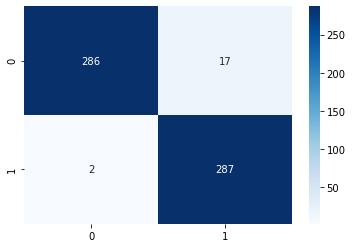

In [58]:
sns.heatmap(confusion_matrix(y_test, random_forest_gs_ypred), cmap= "Blues", annot=True, fmt='')

Confusion matrix of Support Vector Machine (SVM)

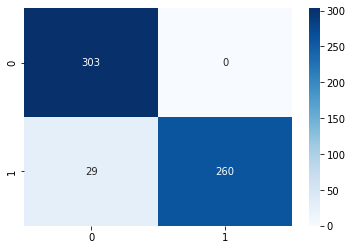

In [59]:
sns.heatmap(confusion_matrix(y_test, svc_gs_ypred), cmap= "Blues", annot=True, fmt='')

### 8.3 ROC curve

ROC curve of Random Forest Classifier

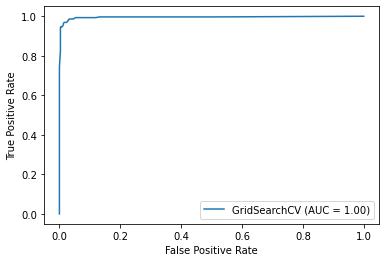

In [60]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(random_forest_gs, X_test, y_test)

ROC curve of Support Vector Machine (SVM)

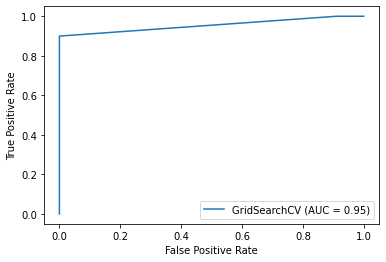

In [61]:
plot_roc_curve(svc_gs, X_test, y_test)

### 8.4 Cross-validated metrics

Random Forest Cross-validated Metrics

In [66]:
random_forest_gs_cv = RandomForestClassifier(n_estimators=random_forest_gs.best_params_["n_estimators"], random_state=42)
random_forest_gs_cv.fit(X_train, y_train)
random_forest_gs_cv_acc = cross_val_score(random_forest_gs_cv, X, y, cv=10, scoring="accuracy")
random_forest_gs_cv_pre = cross_val_score(random_forest_gs_cv, X, y, cv=10, scoring="precision")
random_forest_gs_cv_recall = cross_val_score(random_forest_gs_cv, X, y, cv=10, scoring="recall")
random_forest_gs_cv_f1 = cross_val_score(random_forest_gs_cv, X, y, cv=10, scoring="f1")

In [68]:
random_forest_gs_cv_metrics = pd.DataFrame({"Accuracy": np.mean(random_forest_gs_cv_acc),
                                                     "Precision": np.mean(random_forest_gs_cv_pre),
                                                     "Recall": np.mean(random_forest_gs_cv_recall),
                                                     "F1": np.mean(random_forest_gs_cv_f1)},
                                                      index=["Result"]).T
random_forest_gs_cv_metrics
random_forest_gs_cv_metrics_fig = px.bar(random_forest_gs_cv_metrics, y=random_forest_gs_cv_metrics["Result"] * 100)
random_forest_gs_cv_metrics_fig.update_layout(title_text='Random Forest Cross-validated Metrics')
random_forest_gs_cv_metrics_fig.show()

SVM Cross-validated Metrics

In [69]:
svc_gs_cv = SVC(gamma=svc_gs.best_params_["gamma"], C=svc_gs.best_params_["C"])
svc_gs_cv.fit(X_train, y_train)
svc_gs_cv_acc = cross_val_score(svc_gs_cv, X, y, cv=10, scoring="accuracy")
svc_gs_cv_pre = cross_val_score(svc_gs_cv, X, y, cv=10, scoring="precision")
svc_gs_cv_recall = cross_val_score(svc_gs_cv, X, y, cv=10, scoring="recall")
svc_gs_cv_f1 = cross_val_score(svc_gs_cv, X, y, cv=10, scoring="f1")

In [71]:
svc_gs_cv_metrics = pd.DataFrame({"Accuracy": np.mean(svc_gs_cv_acc),
                                                     "Precision": np.mean(svc_gs_cv_pre),
                                                     "Recall": np.mean(svc_gs_cv_recall),
                                                     "F1": np.mean(svc_gs_cv_f1)},
                                                      index=["Result"]).T
svc_gs_cv_metrics
svc_gs_cv_metrics_fig = px.bar(svc_gs_cv_metrics, y=svc_gs_cv_metrics["Result"] * 100)
svc_gs_cv_metrics_fig.update_layout(title_text='Cross-validated Support Vector Machine Metrics')
svc_gs_cv_metrics_fig.show()